In [1]:
import numpy as np
import scipy.integrate as spyint
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


/tmp/ipykernel_141527/2117955736.py:2: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.integrate as spyint


In [ ]:
def solveFHN(prm):
    def FHN(t, y):
        u,v = y[0], y[1]
        dudt = u*(1-u)*(u-prm['a']) - v
        dvdt = prm['e']*(prm['k']*u-v-prm['b'])
        return [dudt, dvdt]
    
    sol = spyint.solve_ivp(FHN, (0 , prm['tmax']), prm['y0'], method='RK45' )
    return sol.y, sol.t

def FHNString(prm):
    # N = y//2
    def core(t, y):
        u = y[:prm['N']]; v = y[prm['N']:]
        dudt = u*(1-u)*(u-prm['a']) - v 
        
        dvdt0 =  prm['D']*(v[1]-v[0]); dvdtn = prm['D']*(v[-2]-v[-1])
        coupling = v[0:-2] + v[2:] - 2*v[1:-1]
        dvdti = prm['e'] *(prm['k']*u[1:-1]  - v[1:-1] -prm['b']) +prm['D']*coupling
        
        # dvdt = np.concatenate([np.array(dvdt0), dvdti, np.array(dvdtn)])
        dvdt = np.hstack(([dvdt0], dvdti, [dvdtn]))
        return np.concatenate([dudt,dvdt])

    sol = spyint.solve_ivp(core, (0,prm['tmax']), prm['y0'], method='RK45')
    return sol.y, sol.t

def solve_plot(prm):
    ysol, t = FHNString(prm)

    plt.figure(figsize=(10, 3))
    plt.imshow(ysol[:prm['N']], cmap='inferno', aspect='auto', interpolation='nearest')
    cbar = plt.colorbar()   
    cbar.set_label('$u$')
    # plt.title(str(prm))

# Single oscillator dynamics

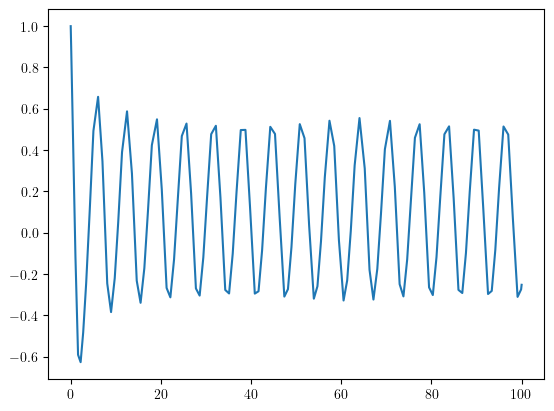

In [47]:
one_osc = {
    'e': .2,  # Recovery rate
    'a': -.2,         # Resting state parameter
    'b': .5,
    'k': 5,
    'tmax': 100,
    'y0':[1,1]
}
y1, t1 = solveFHN(one_osc)
plt.plot(t1, y1[0,:])
# plt.plot(t, y[1,:])

# Anti-Phase Sync


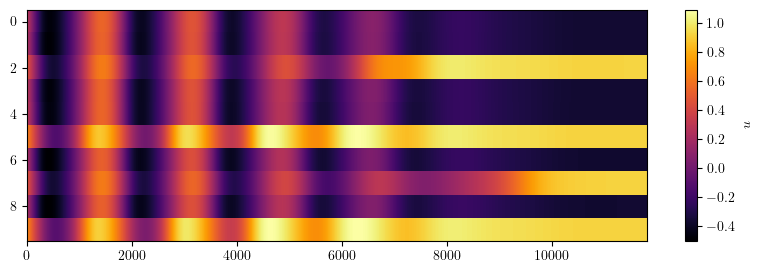

In [51]:
APS = {
    'N' : 10,
# OG APS parameters
    # 'a' : .139, 
    # 'e' : .1e-3, 
    # 'k' : .6, 
    # 'b' : .65e-1, 
    'D' : .2e3, 
    'tmax' : 50, 
    'y0': np.random.uniform(0,1,20),
    # 'y0' : np.zeros(20)
# Paramters for oscillation
    'e': .2,  # Recovery rate
    'a': -.2,         # Resting state parameter
    'b': .5,
    'k': 5,
}

solve_plot(APS)

Single FHN oscillator for the same parameter value;

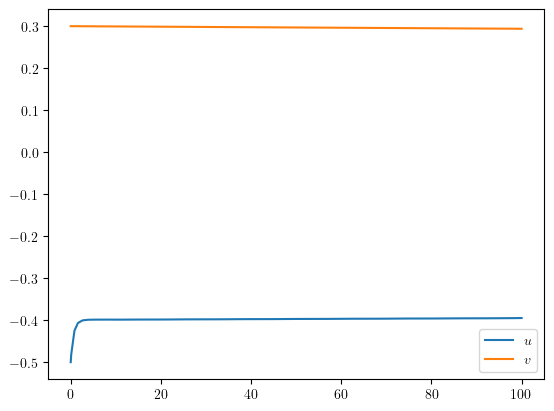

In [50]:
def solveFHN(prm):
    def FHN(t, y):
        u,v = y[0], y[1]
        dudt = u*(1-u)*(u-prm['a']) - v
        dvdt = prm['e']*(prm['k']*u-v-prm['b'])
        return [dudt, dvdt]
    
    sol = spyint.solve_ivp(FHN, (0 , prm['tmax']), prm['y0'], method='RK45' )
    return sol.y, sol.t

APS = {
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : .8e-1, 
    'D' : .4e3, 
    'tmax' : 100, 
    # 'tn' : 10,
    'y0': [-.5, .3]
    # 'y0' : np.zeros(20)
}

y, t = solveFHN(APS)
plt.plot(t, y[0,:], label='$u$')
plt.plot(t, y[1,:], label='$v$')
plt.legend()

# Spatially patterned oscillator death

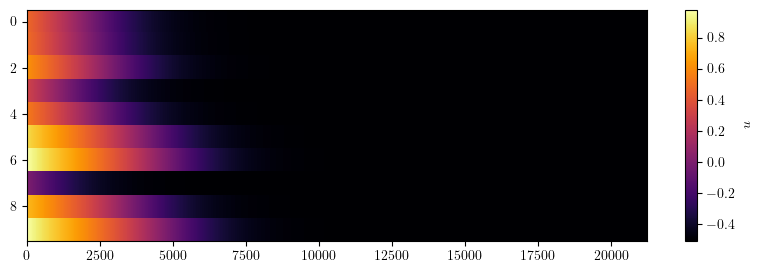

In [4]:
SPOD = {
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : 1.6e-1, 
    'D' : 1.8e3, 
    'tmax' : 10, 
    'tn' : 10,
    'y0': np.random.uniform(0,1,20),
    # 'y0' : np.zeros(20)
}

solve_plot(SPOD)

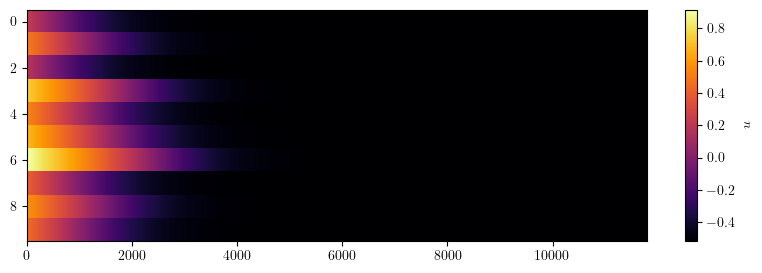

In [5]:
SO = {
    'N' : 10,
    'a' : .139, 
    'e' : .1e-3, 
    'k' : .6, 
    'b' : 6, 
    'D' : 1e3, 
    'tmax' : 10, 
    'tn' : 10,
    'y0': np.random.uniform(0,1,20),
    # 'y0' : np.zeros(20)
}

solve_plot(SO)


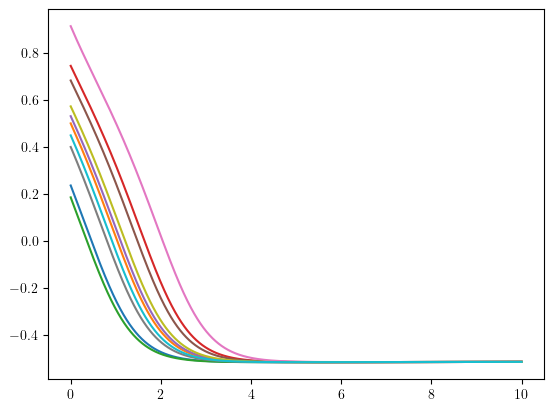

In [6]:
ysol, t = FHNString(SO)
for i in range(SO['N']):
    plt.plot(t, ysol[i,:])